In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 6})#, 'font.sans-serif': 'Arial'})
plt.rcParams.update({'font.sans-serif':'Arial'})
import matplotlib as mpl
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
plt.rcParams['svg.fonttype'] = 'none'
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 
import matplotlib.pyplot as plt
source_path = './source_data/FIG5/'

/var/folders/cl/sjgtx3y51792n2h_w3pck2q80000gn/T/ipykernel_92339/2334595630.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(ax=ax,data=df[np.logical_not(np.isnan(df['acoustic-phonetic']))
/var/folders/cl/sjgtx3y51792n2h_w3pck2q80000gn/T/ipykernel_92339/2334595630.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax,data=df[np.logical_not(np.isnan(df['acoustic-phonetic']))
/var/folders/cl/sjgtx3y51792n2h_w3pck2q80000gn/T/ipykernel_92339/2334595630.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(xticklabels=['IED\nonly','Task\nonly','Mod.\nboth'],


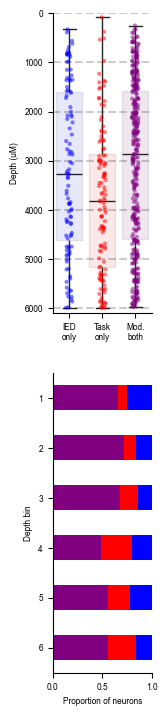

In [4]:
import seaborn as sns
import numpy as np
import pandas as pd
df = pd.read_csv(f'{source_path}/task_ied_df.csv')
depth_clus_summary = pd.read_csv(f'{source_path}/depth_clus_summary.csv').iloc[:,1:]
bins = np.array([   0., 1000., 2000., 3000., 4000., 5000., 6000.])
fig,axs = plt.subplots(2,1,figsize=(1.5,7))
fig.subplots_adjust(left=0.3, right=0.96, top=0.99, bottom=0.048)
# 0: both, 1: only task, 2: only ied
depth_cut = 6000
ax = axs[0]
sns.stripplot(ax=ax,data=df[np.logical_not(np.isnan(df['acoustic-phonetic']))
              & (df.depth_y < depth_cut)],
                      x='act_codes',y='depth_y',palette=['b','r','purple'],order=[2,1,0],s=3,alpha=0.5)
sns.boxplot(ax=ax,data=df[np.logical_not(np.isnan(df['acoustic-phonetic']))
            & (df.depth_y < depth_cut) ],x='act_codes',y='depth_y',palette=['b','r','purple'],order=[2,1,0],
           boxprops=dict(alpha=0.1))
for b in bins: ax.axhline(b,color='k',linestyle='--',alpha=0.2)
ax.invert_yaxis()
ax.set(xticklabels=['IED\nonly','Task\nonly','Mod.\nboth'],
       ylim=[depth_cut+100,0],xlabel='',ylabel='Depth (uM)')

ax = axs[1]
depth_clus_summary.iloc[:,1:].plot(ax=ax,kind='barh', stacked=True, color=['purple','r','b'],legend=None)
ax.set(ylabel='Depth bin',xlabel='Proportion of neurons',yticklabels=range(1,7),xlim=[0,1],xticks=[0,0.5,1])
ax.invert_yaxis()

df[np.logical_not(np.isnan(df['acoustic-phonetic']))
              & (df.depth_y < depth_cut)].to_csv('./statistical_source/FIG5/panele.csv')

depth_clus_summary.to_csv('./statistical_source/FIG5/panelf.csv')

#plt.savefig('./current_composite/mod_ied_task_depth_timit_new.pdf',dpi=800,transparent=True)#,bbox_inches='tight')

In [5]:
df.act_codes.unique()

array([0, 1, 3, 2])

In [6]:
stat_df = df[np.logical_not(np.isnan(df['acoustic-phonetic']))
            & (df.depth_y < depth_cut)] 

In [7]:
from scipy.stats import ranksums
print(ranksums(stat_df.loc[stat_df.act_codes == 2,'depth_y'],
               stat_df.loc[stat_df.act_codes == 1,'depth_y']))
print(ranksums(stat_df.loc[stat_df.act_codes == 1,'depth_y'],
               stat_df.loc[stat_df.act_codes == 0,'depth_y']))
print(np.sum(stat_df.act_codes == 2))
print(np.sum(stat_df.act_codes == 1))
print(np.sum(stat_df.act_codes == 0))

RanksumsResult(statistic=-2.5075688842784976, pvalue=0.01215648843733276)
RanksumsResult(statistic=4.199462262932807, pvalue=2.675496141243879e-05)
104
120
348


In [8]:
from statsmodels.stats.proportion import proportions_ztest
count = np.array([72, 45])#, 18])
nobs = np.array([106,92])#,124])
stat, pval = proportions_ztest(count, nobs)
print(stat,pval)

2.713688775633208 0.006653864531418868


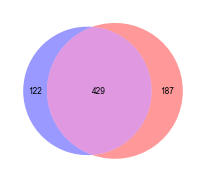

In [9]:
uni,cnts = np.unique(df[np.logical_not(np.isnan(df['acoustic-phonetic']))].act_codes,return_counts=True)
from matplotlib_venn import venn2
fig,ax = plt.subplots(figsize=(2.4,40))
venn2(subsets = cnts[[2,1,0]],ax=ax,set_colors=['b','r'],
     set_labels = ['',''])
#plt.savefig('./current_composite/venn_task_ied.pdf',dpi=800,bbox_inches='tight',transparent=True)

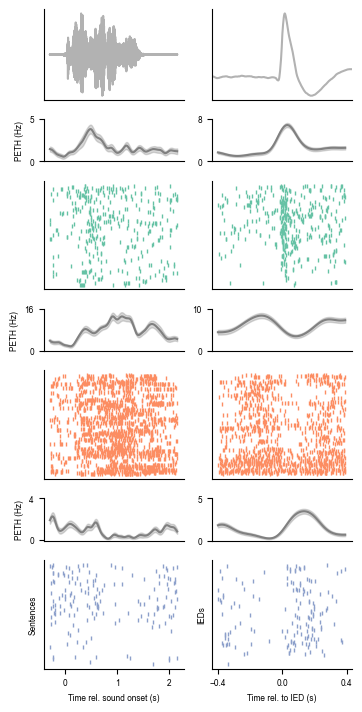

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# ---------------------------
# LOAD
# ---------------------------
D = np.load(
    f"{source_path}/new_raster_schem_minimal_source.npz",
    allow_pickle=True
)

clusters = D["clusters"]
cols = sns.color_palette("Set2")

# ---------------------------
# SIMPLE RASTER FUNCTION
# ---------------------------
def plot_raster(ax, spks, events, tlim, color):
    for i, ev in enumerate(events):
        aligned = spks - ev
        aligned = aligned[(aligned >= tlim[0]) & (aligned <= tlim[1])]
        ax.scatter(aligned, np.repeat(i,len(aligned)),color=color,linewidth=1,marker='|',s=8)
        #ax.vlines(aligned, i, i + 0.8, color=color, linewidth=3)

# ---------------------------
# FIGURE / GRID
# ---------------------------
fig = plt.figure(figsize=(3.5, 7))
gs = gridspec.GridSpec(
    7, 2,
    height_ratios=[0.75, 0.35, 0.9, 0.35, 0.9, 0.35, 0.9],
    hspace=0.25
)
fig.subplots_adjust(left=0.11, right=0.99, top=0.99, bottom=0.048)

axs = np.empty((7, 2), dtype=object)

for r in range(7):
    for c in range(2):
        axs[r, c] = fig.add_subplot(gs[r, c])

# ---------------------------
# TOP LEFT: SOUND
# ---------------------------
axs[0, 0].plot(D["sound_t"], D["sound"], color="k", alpha=0.3)
axs[0, 0].set(xticks=[], yticks=[])

# ---------------------------
# TOP RIGHT: LFP
# ---------------------------
axs[0, 1].plot(D["lfp_t"], D["lfp_mean"], color="k", alpha=0.3)
axs[0, 1].set(xlim=[-0.4, 0.4], xticks=[], yticks=[])

# ---------------------------
# MAIN LOOP
# ---------------------------
for i, clus in enumerate(clusters):
    c = cols[i]

    # ---- SOUND TRACE ----
    ax = axs[2*i+1, 0]
    sig = clus["sound_sig"] #* 6
    err = clus["sound_sem"] #* 6
    t = clus["sound_t"]

    ax.plot(t, sig, color="grey")
    ax.fill_between(t, sig-err, sig+err, color="grey", alpha=0.3)
    ax.set(xticks=[], yticks=[0, round(np.max(sig+err)+1)], ylabel="PETH (Hz)")

    # ---- SOUND RASTER ----
    ax = axs[2*i+2, 0]
    plot_raster(ax, clus["sound_spks"], clus["sound_events"], [-0.3, D["t_pad"]], c)
    ax.set(
        xticks=[0,1,2] if i==2 else [],
        xlabel="Time rel. sound onset (s)" if i==2 else "",
        ylabel="Sentences" if i==2 else "",yticks=[]
    )

    # ---- IED TRACE ----
    ax = axs[2*i+1, 1]
    sig = clus["ied_sig"] #* 15
    err = clus["ied_sem"] #* 15
    t = clus["ied_t"]

    ax.plot(t, sig, color="grey")
    ax.fill_between(t, sig-err, sig+err, color="grey", alpha=0.3)
    ax.set(xticks=[], yticks=[0, round(np.max(sig+err)+1)])

    # ---- IED RASTER ----
    ax = axs[2*i+2, 1]
    plot_raster(ax, clus["ied_spks"], clus["ied_events"], [-0.4, 0.4], c)
    ax.set(
        xticks=[-0.4,0,0.4] if i==2 else [],
        xlabel="Time rel. to IED (s)" if i==2 else "",
        ylabel="IEDs" if i==2 else "",yticks=[]
    )

# ---------------------------
# SAVE
# ---------------------------
# plt.savefig(
#     "./current_composite/new_raster_schem_split_trace_compact_REMADE.pdf",transparent=True,
#     dpi=800,
#     #bbox_inches="tight"
# )
plt.show()


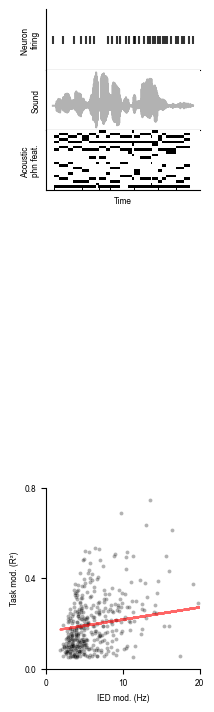

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2
from sklearn.linear_model import LinearRegression

# ============================================================
# LOAD DATA
# ============================================================

D = np.load(
    f"{source_path}/acoustic_phn_schem_minimal_source.npz",
    allow_pickle=True
)

# df is assumed to already exist (unchanged from your code)

# ============================================================
# MASTER FIGURE (3 x 1)
# ============================================================

fig, axs = plt.subplots(
    3, 1,
    figsize=(2, 7),
    gridspec_kw=dict(hspace=0.45),height_ratios=[1,0.8,1]
)
fig.subplots_adjust(left=0.2, right=0.97, top=0.99, bottom=0.048)

# ============================================================
# PANEL 1 — Acoustic / phonetic schematic (stacked internally)
# ============================================================

# Create internal subgrid to preserve exact layout
gs_inner = axs[0].get_subplotspec().subgridspec(3, 1, hspace=0.0)
axs[0].remove()

ax_neuron = fig.add_subplot(gs_inner[0])
ax_sound  = fig.add_subplot(gs_inner[1])
ax_feat   = fig.add_subplot(gs_inner[2])

# ---- neuron firing ----
spks = D["spks"]
ax_neuron.scatter(spks, np.ones_like(spks), color="k", alpha=0.8, marker="|")
ax_neuron.set(ylabel="Neuron \nfiring", yticks=[], xticks=[])

# ---- sound ----
ax_sound.plot(D["sound"], color="k", alpha=0.3)
ax_sound.set(ylabel="Sound", yticks=[], xticks=[])

# ---- acoustic / phonetic features ----
feat_mat = D["feat_mat"]
t_ar = D["t_feat"]

feat_list = ["word onset"]
feat_list.extend(list(D["feat_names"]))

ax_feat.pcolormesh(
    t_ar,
    range(len(feat_list)),
    feat_mat,
    cmap="binary",
    vmin=0,
    vmax=1
)

ax_feat.set(
    ylabel="Acoustic \nphn feat.",
    yticks=[],
    xticks=[],
    xlabel="Time"
)

# ============================================================
# PANEL 2 — Venn diagram
# ============================================================

ax = axs[1]
ax.set_visible(False)
# uni, cnts = np.unique(
#     df[np.logical_not(np.isnan(df['acoustic-phonetic']))].act_codes,
#     return_counts=True
# )

# venn2(
#     subsets=cnts[[2, 1, 0]],
#     ax=ax,
#     set_colors=['b', 'r'],
#     set_labels=['', '']
# )

# ============================================================
# PANEL 3 — Correlation scatter + regression
# ============================================================

ax = axs[2]

tmp = df[
    np.logical_not(np.isnan(df['acoustic-phonetic'])) &
    (df['acoustic-phonetic'] > 0.05) &
    (df['ied_p_mod'] < 0.05)
].copy()

tmp['log_p'] = tmp.mod_depth.values

model = LinearRegression(fit_intercept=True)
x = tmp.log_p.values.reshape(-1, 1)
y = tmp['acoustic-phonetic'].values
model.fit(x, y)
y_pred = model.predict(x)

tmp.to_csv('./statistical_source/FIG5/paneld.csv')
sns.scatterplot(
    ax=ax,
    data=tmp,
    y='acoustic-phonetic',
    x='log_p',
    s=8,
    c='k',
    alpha=0.3,
    legend=None
)

ax.plot(
    x,
    y_pred,
    color='r',
    linestyle='--',
    alpha=0.6
)

ax.set(
    xlabel='IED mod. (Hz)',
    ylabel='Task mod. (R²)',
    xlim=[0,20],ylim=[0,0.8],yticks=[0,0.4,0.8],xticks=[0,10,20]
)

# ============================================================
# SAVE
# ============================================================

# plt.savefig(
#     "./current_composite/acoustic_task_ied_COMPOSITE.pdf",transparent=True,
#     dpi=800,
#     #bbox_inches="tight"
# )
plt.show()


In [14]:
from scipy.stats import spearmanr
spearmanr(tmp.log_p,tmp['acoustic-phonetic'])

SignificanceResult(statistic=0.4290520607408241, pvalue=1.2181432356806497e-20)